In [2]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

# Imorting ML Preprocessing and Metrics Libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    Normalizer,
    RobustScaler,
    LabelEncoder,
    OneHotEncoder,
)
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import cross_val_score, train_test_split
from category_encoders import LeaveOneOutEncoder

# Importing Classifiers
from sklearn.ensemble import StackingRegressor, RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# Some Extra Libraries
import warnings as w

w.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
original = pd.read_csv("original_data.csv")

This dataset provides a comprehensive and diverse analysis of an organization's employees, focusing on areas such as employee attrition, personal and work-related factors, and resources. main. Includes more than 35 attributes and their meanings are as follows:

|STT | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |
| 4 | DailyRate | Daily salary rate for employees |
| 5 | Department | Office of employees |
| 6 | DistanceFromHome | Distance from home in miles to work |
| 7 | Education | Level of education achieved by staff |
| 8 | EducationField | Employee's field of study |
| 9 | EmployeeCount | Total number of employees in the organization |
| 10 | EmployeeNumber | A unique identifier for each employee record |
| 11 | EnvironmentSatisfaction | Employee satisfaction with their working environment |
| 12 | HourlyRate | Hourly rate for employees |
| 13 | JobInvolvement | Level of involvement required for the employee's job |
| 14 | JobLevel | Employee's level of work |
| 15 | JobRole | The role of employees in the organization |
| 16 | JobSatisfaction | Employee satisfaction with their work |
| 17 | MaritalStatus | Employee's marital status |
| 18 | MonthlyIncome | Employee's monthly income |
| 19 | MonthlyRate | Monthly salary rate for employees |
| 20 | NumCompaniesWorked | Number of companies the employee worked for |
| 21 | Over18 | Whether the employee is over 18 years old |
| 22 | OverTime | Do employees work overtime |
| 23 | PercentSalaryHike | Salary increase rate for employees |
| 24 | PerformanceRating | The performance rating of the employee |
| 25 | RelationshipSatisfaction | Employee satisfaction with their relationships |
| 26 | StandardHours | Standard working hours for employees |
| 27 | StockOptionLevel | Employee stock option level |
| 28 | TotalWorkingYears | Total number of years the employee has worked |
| 29 | TrainingTimesLastYear | Number of times employees were taken to training in the last year |
| 30 | WorkLifeBalance | Employees' perception of their work-life balance |
| 31 | YearsAtCompany | Number of years employees have been with the company |
| 32 | YearsInCurrentRole | Number of years the employee has been in their current role |
| 33 | YearsSinceLastPromotion | Number of years since employee's last promotion |
| 34 | YearsWithCurrManager | Number of years an employee has been with their current manager |
| 35 | Attrition | Does the employee leave the organization |





In [4]:
train["is_generated"] = 1
test["is_generated"] = 1
original["is_generated"] = 0

In [5]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,is_generated
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0,1
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0,1
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0,1
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0,1
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1,1


In [6]:
original.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_generated
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [7]:
test.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_generated
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0,1
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2,1
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7,1
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8,1
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0,1


In [8]:
display(len(train.columns))
display(len(test.columns))
display(len(original.columns))

36

35

36

##### **💬 Comment**: The following columns can be omitted because their values do not affect the analysis results
1. `Over18`: All values are `Y`
2. `EmployeeCount`: all values are `1.0`
3. `StandardHours`: all values are `80.0`
4. `EmployeeNumber`: is the `id` of the employee that has the same meaning as the `index` of each line
5. 'EmployeeCount': all values are `1.0`

In [9]:
att = {"Yes": 1, "No": 0}


def drop_cols(df):
    if df is train:
        df = df.drop(columns=["id", "Over18", "StandardHours", "EmployeeCount"])
    elif df is test:
        df = df.drop(columns=["Over18", "StandardHours", "EmployeeCount"])
    else:
        df["Attrition"] = df["Attrition"].map(att)
        df = df.drop(
            columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"]
        )
    return df


train = drop_cols(train)
test = drop_cols(test)
original = drop_cols(original)

In [10]:
display(len(train.columns))
display(len(test.columns))
display(len(original.columns))

32

32

32

In [11]:
train[train["Education"] == 15]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,is_generated
527,38,Travel_Rarely,548,Research & Development,1,15,Life Sciences,1,Female,72,3,1,Laboratory Technician,4,Divorced,2644,6217,7,No,13,3,1,1,7,2,3,5,2,1,4,0,1


In [12]:
train[train["JobLevel"] == 7]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,is_generated
1535,30,Travel_Rarely,583,Research & Development,6,3,Life Sciences,4,Female,100,3,7,Manufacturing Director,3,Single,5326,22490,3,No,13,3,4,0,12,1,2,8,7,1,5,0,1


In [13]:
# Repalcing the outliers.
train.at[527, "Education"] = 5
train.at[1535, "JobLevel"] = 5
train.at[1398, "DailyRate"] = train["DailyRate"].median()

In [14]:
# Concatenating the train and original data.
train = pd.concat([train, original], axis=0).reset_index(drop=True)
print(train.duplicated().sum())
train.drop_duplicates(inplace=True)
print(train.duplicated().sum())
print(train.shape)

0
0
(3147, 32)


# Feature Engineering

In [15]:
def feature_risk_factors(df):
    df["risk_factors"] = df[
        [
            "RelationshipSatisfaction",
            "MonthlyIncome",
            "BusinessTravel",
            "Department",
            "EducationField",
            "Education",
            "JobInvolvement",
            "JobSatisfaction",
            "RelationshipSatisfaction",
            "StockOptionLevel",
            "TrainingTimesLastYear",
            "WorkLifeBalance",
            "OverTime",
        ]
    ].apply(
        lambda x: 0
        + (1 if x.MonthlyIncome < 3000 else 0)
        + (1 if x.BusinessTravel == "Travel_Frequently" else 0)
        + (1 if x.Department == "Human Resources" else 0)
        + (1 if x.EducationField in ["Human Resources", "Marketing"] else 0)
        + (1 if x.Education == 1 else 0)
        + (1 if x.JobInvolvement == 1 else 0)
        + (1 if x.JobSatisfaction == 1 else 0)
        + (1 if x.StockOptionLevel == 0 else 0)
        + (1 if x.TrainingTimesLastYear == 0 else 0)
        + (1 if x.WorkLifeBalance == 1 else 0)
        + (1 if x.OverTime == 1 else 0),
        axis=1,
    )
    return df


train = feature_risk_factors(train)
test = feature_risk_factors(test)
# original = feature_risk_factors(original)

In [16]:
le = LabelEncoder()
loo = LeaveOneOutEncoder(sigma=0.05, random_state=0)

le_cols = ["Gender", "OverTime", "MaritalStatus", "PerformanceRating"]
ohe_cols = [
    "Department",
    "BusinessTravel",
]
loo_cols = ["EducationField", "JobRole"]


def encode_labels(df, cols):
    for col in cols:
        df[col] = le.fit_transform(df[col])
    return df


def ohe_labels(df, cols):
    df = pd.get_dummies(df, columns=ohe_cols)
    return df


train[loo_cols] = loo.fit_transform(train[loo_cols], train["Attrition"])
test[loo_cols] = loo.transform(test[loo_cols])
# original[loo_cols] = loo.transform(original[loo_cols])

train = encode_labels(train, le_cols)
test = encode_labels(test, le_cols)
# original = encode_labels(original, le_cols)

train = ohe_labels(train, ohe_cols)
test = ohe_labels(test, ohe_cols)
# original = ohe_labels(original, ohe_cols)

# Creating a new feature like dedication, jobskill, satisfaction, MonthlyRateIncome, DailyHoulryRate of Employee

In [17]:
def feature_engineering(df):
    df["Dedication"] = (
        df["YearsAtCompany"] + df["YearsInCurrentRole"] + df["TotalWorkingYears"]
    )
    df["JobSkill"] = df["JobInvolvement"] * df["JobLevel"]
    df["Satisfaction"] = df["EnvironmentSatisfaction"] * df["RelationshipSatisfaction"]
    df["MonthlyRateIncome"] = df["MonthlyIncome"] * df["MonthlyRate"]
    df["HourlyDailyRate"] = df["HourlyRate"] * df["DailyRate"]
    return df


train = feature_engineering(train)
test = feature_engineering(test)
# original = feature_engineering(original)

In [18]:
# Seperating the target and predictors

features = [
    "Age",
    "DistanceFromHome",
    "HourlyDailyRate",
    "Education",
    "risk_factors",
    "EducationField",
    "Gender",
    "JobRole",
    "JobSatisfaction",
    "MonthlyRateIncome",
    "NumCompaniesWorked",
    "OverTime",
    "PercentSalaryHike",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "WorkLifeBalance",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "Department_Research & Development",
    "Department_Sales",
    "BusinessTravel_Travel_Frequently",
    "BusinessTravel_Travel_Rarely",
    "BusinessTravel_Non-Travel",
    "Dedication",
    "JobSkill",
    "Satisfaction",
    "MaritalStatus",
]

target = "Attrition"

In [19]:
train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,is_generated,risk_factors,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Dedication,JobSkill,Satisfaction,MonthlyRateIncome,HourlyDailyRate
0,36,599,24,3,0.135,4,1,42,3,1,0.202,4,1,2596,5099,1,1,13,0,2,1,10,2,3,10,0,7,8,0,1,2,False,True,False,False,True,False,20,3,8,13237004,25158
1,35,921,8,3,0.106,1,1,46,3,1,0.374,1,1,2899,10778,1,0,17,0,4,1,4,3,3,4,2,0,3,0,1,2,False,False,True,False,False,True,10,3,4,31245422,42366
2,32,718,26,3,0.206,3,1,80,3,2,0.133,4,0,4627,16495,0,0,17,0,4,2,4,3,3,3,2,1,2,0,1,1,False,False,True,False,False,True,9,6,12,76322365,57440
3,38,1488,2,3,0.138,3,0,40,3,2,0.065,1,1,5347,13384,3,0,14,0,3,0,15,1,1,6,0,0,2,0,1,3,False,True,False,False,False,True,21,6,9,71564248,59520
4,50,1017,5,4,0.135,2,0,37,3,5,0.060,1,2,19033,19805,1,1,13,0,3,0,31,0,3,31,14,4,10,1,1,3,False,True,False,False,False,True,76,15,6,376948565,37629


In [20]:
test.head()

,id,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_generated,risk_factors,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Dedication,JobSkill,Satisfaction,MonthlyRateIncome,HourlyDailyRate
0,1677,19,992,1,1,0.124,4,1,43,3,1,0.207,3,2,2318,17778,1,0,12,0,4,0,1,2,2,1,0,0,0,1,3,False,True,False,True,False,False,2,3,16,41209404,42656
1,1678,45,1136,4,4,0.196,3,1,67,3,2,0.140,1,0,5486,12421,6,1,12,0,3,1,7,3,3,2,2,2,2,1,2,False,False,True,False,False,True,11,6,9,68141606,76112
2,1679,37,155,13,3,0.128,4,1,41,3,1,0.140,4,0,2741,23577,4,1,13,0,2,2,13,2,2,7,7,1,7,1,1,False,True,False,False,False,True,27,3,8,64624557,6355
3,1680,32,688,1,4,0.128,3,1,89,2,2,0.066,3,2,5228,20364,1,0,13,0,3,0,14,2,2,14,10,11,8,1,1,False,True,False,False,False,True,38,4,9,106462992,61232
4,1681,29,464,9,1,0.128,3,1,79,3,1,0.207,4,2,1223,15178,1,0,14,0,1,0,1,5,3,1,0,0,0,1,4,False,True,False,False,True,False,2,3,3,18562694,36656


In [21]:
print(train.shape)
print(test.shape)

(3147, 42)
(1119, 42)


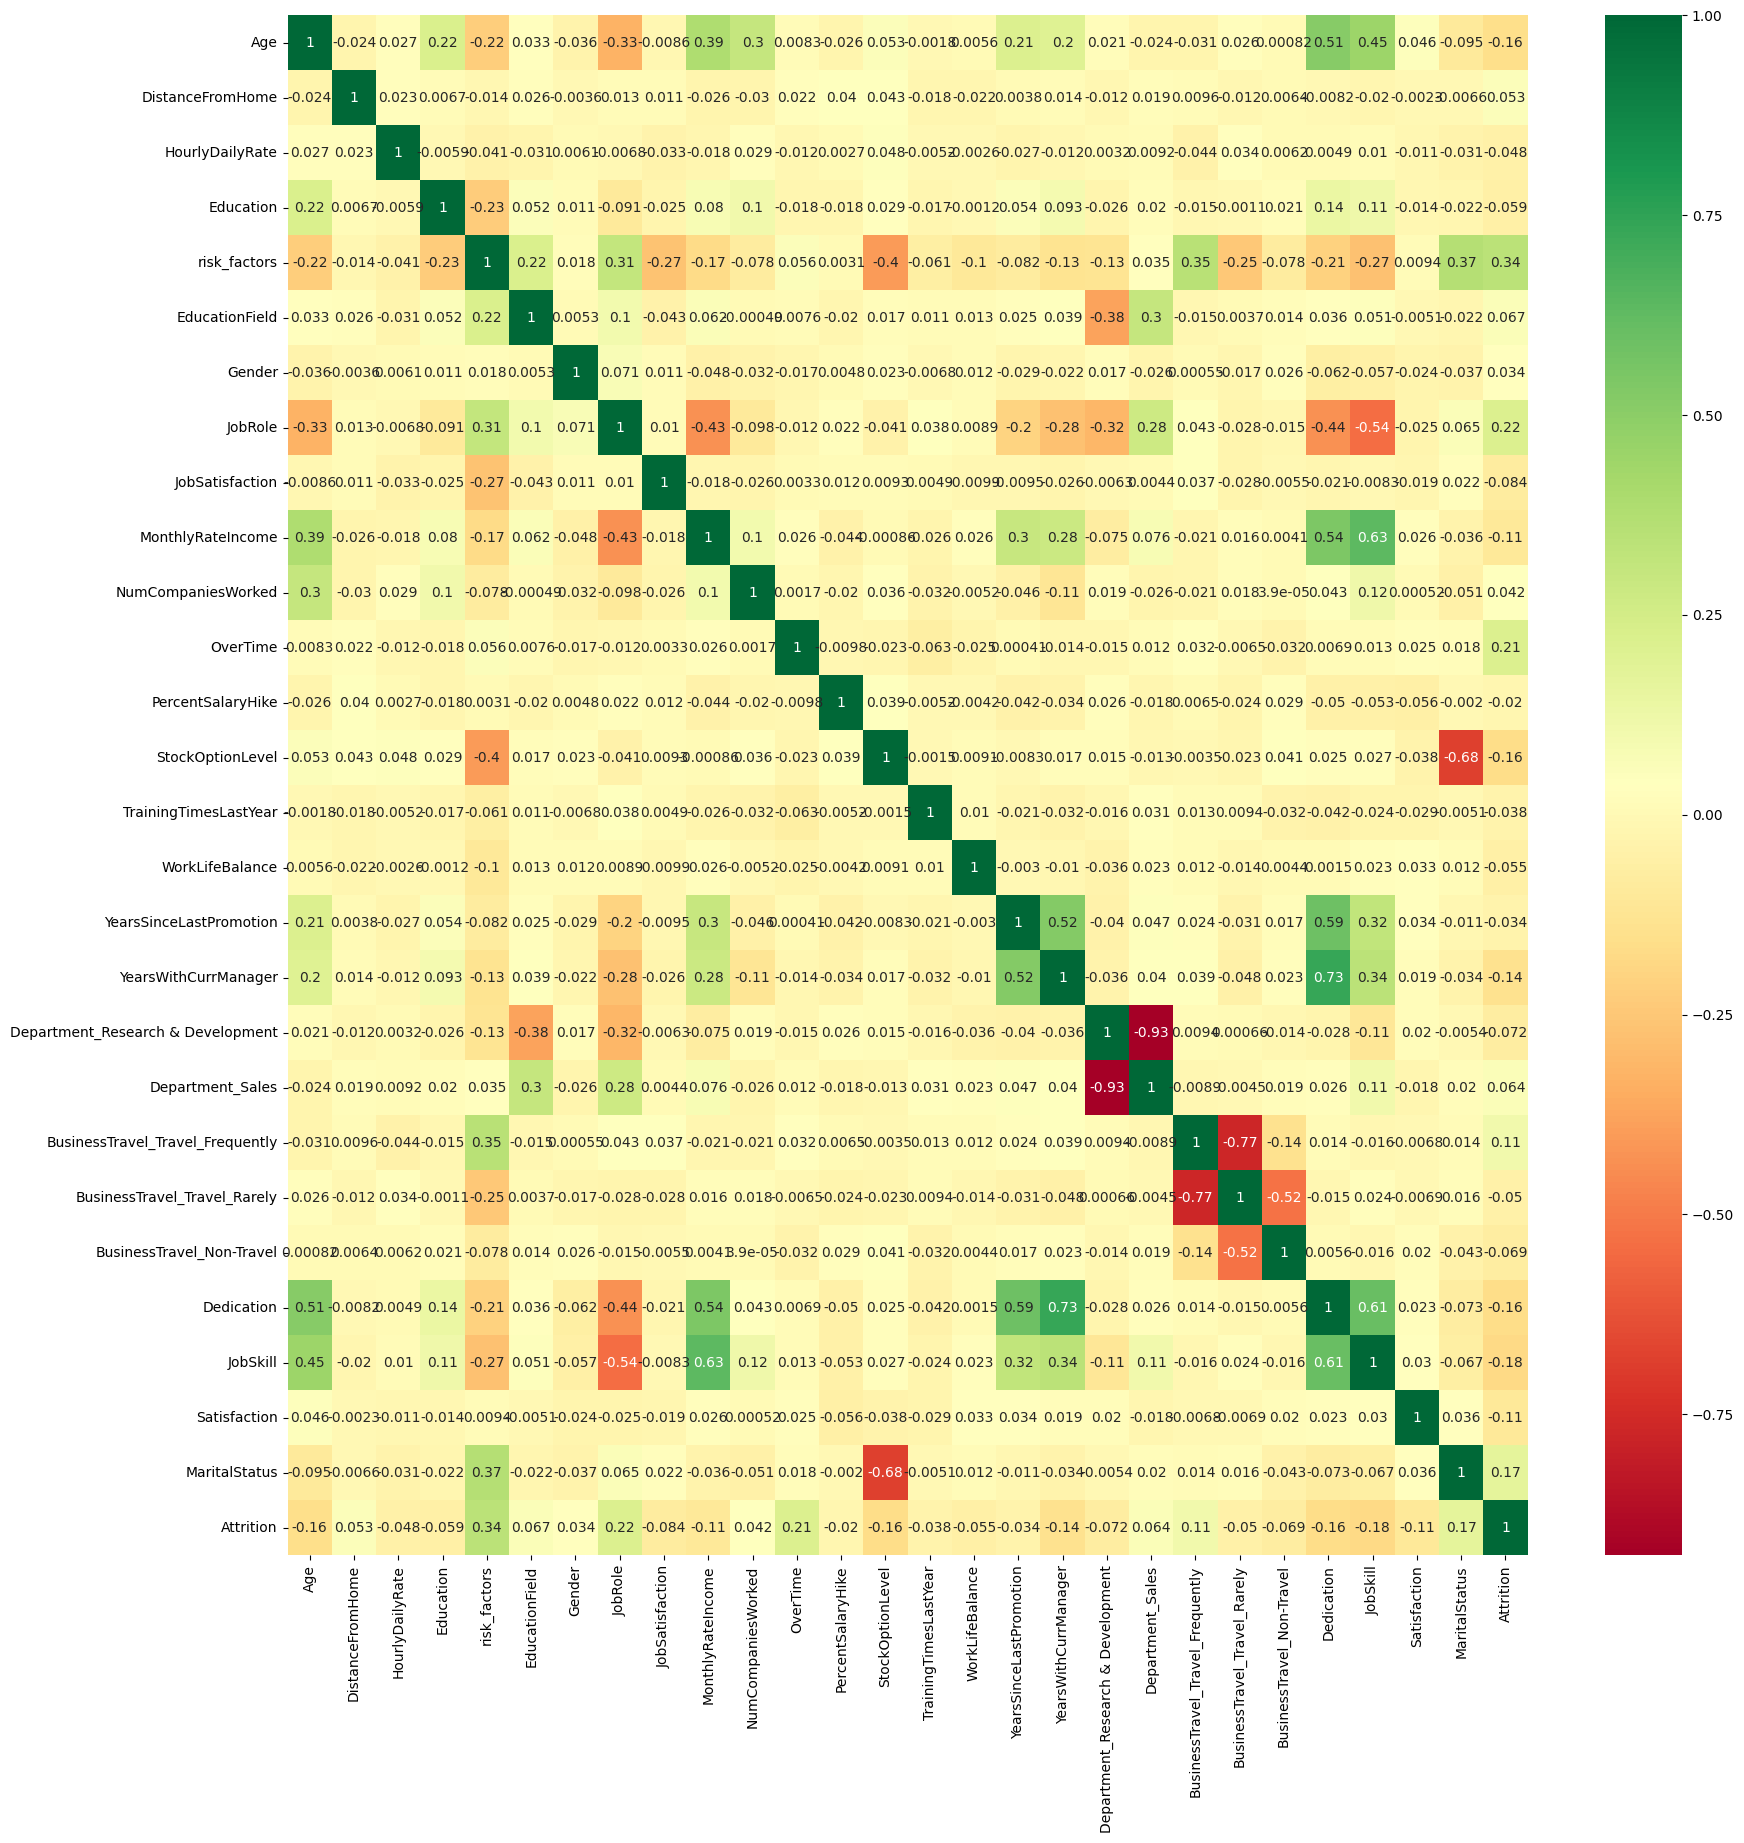

In [28]:
# ploting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(train[features + [target]].corr(), annot=True, cmap="RdYlGn")
plt.show()

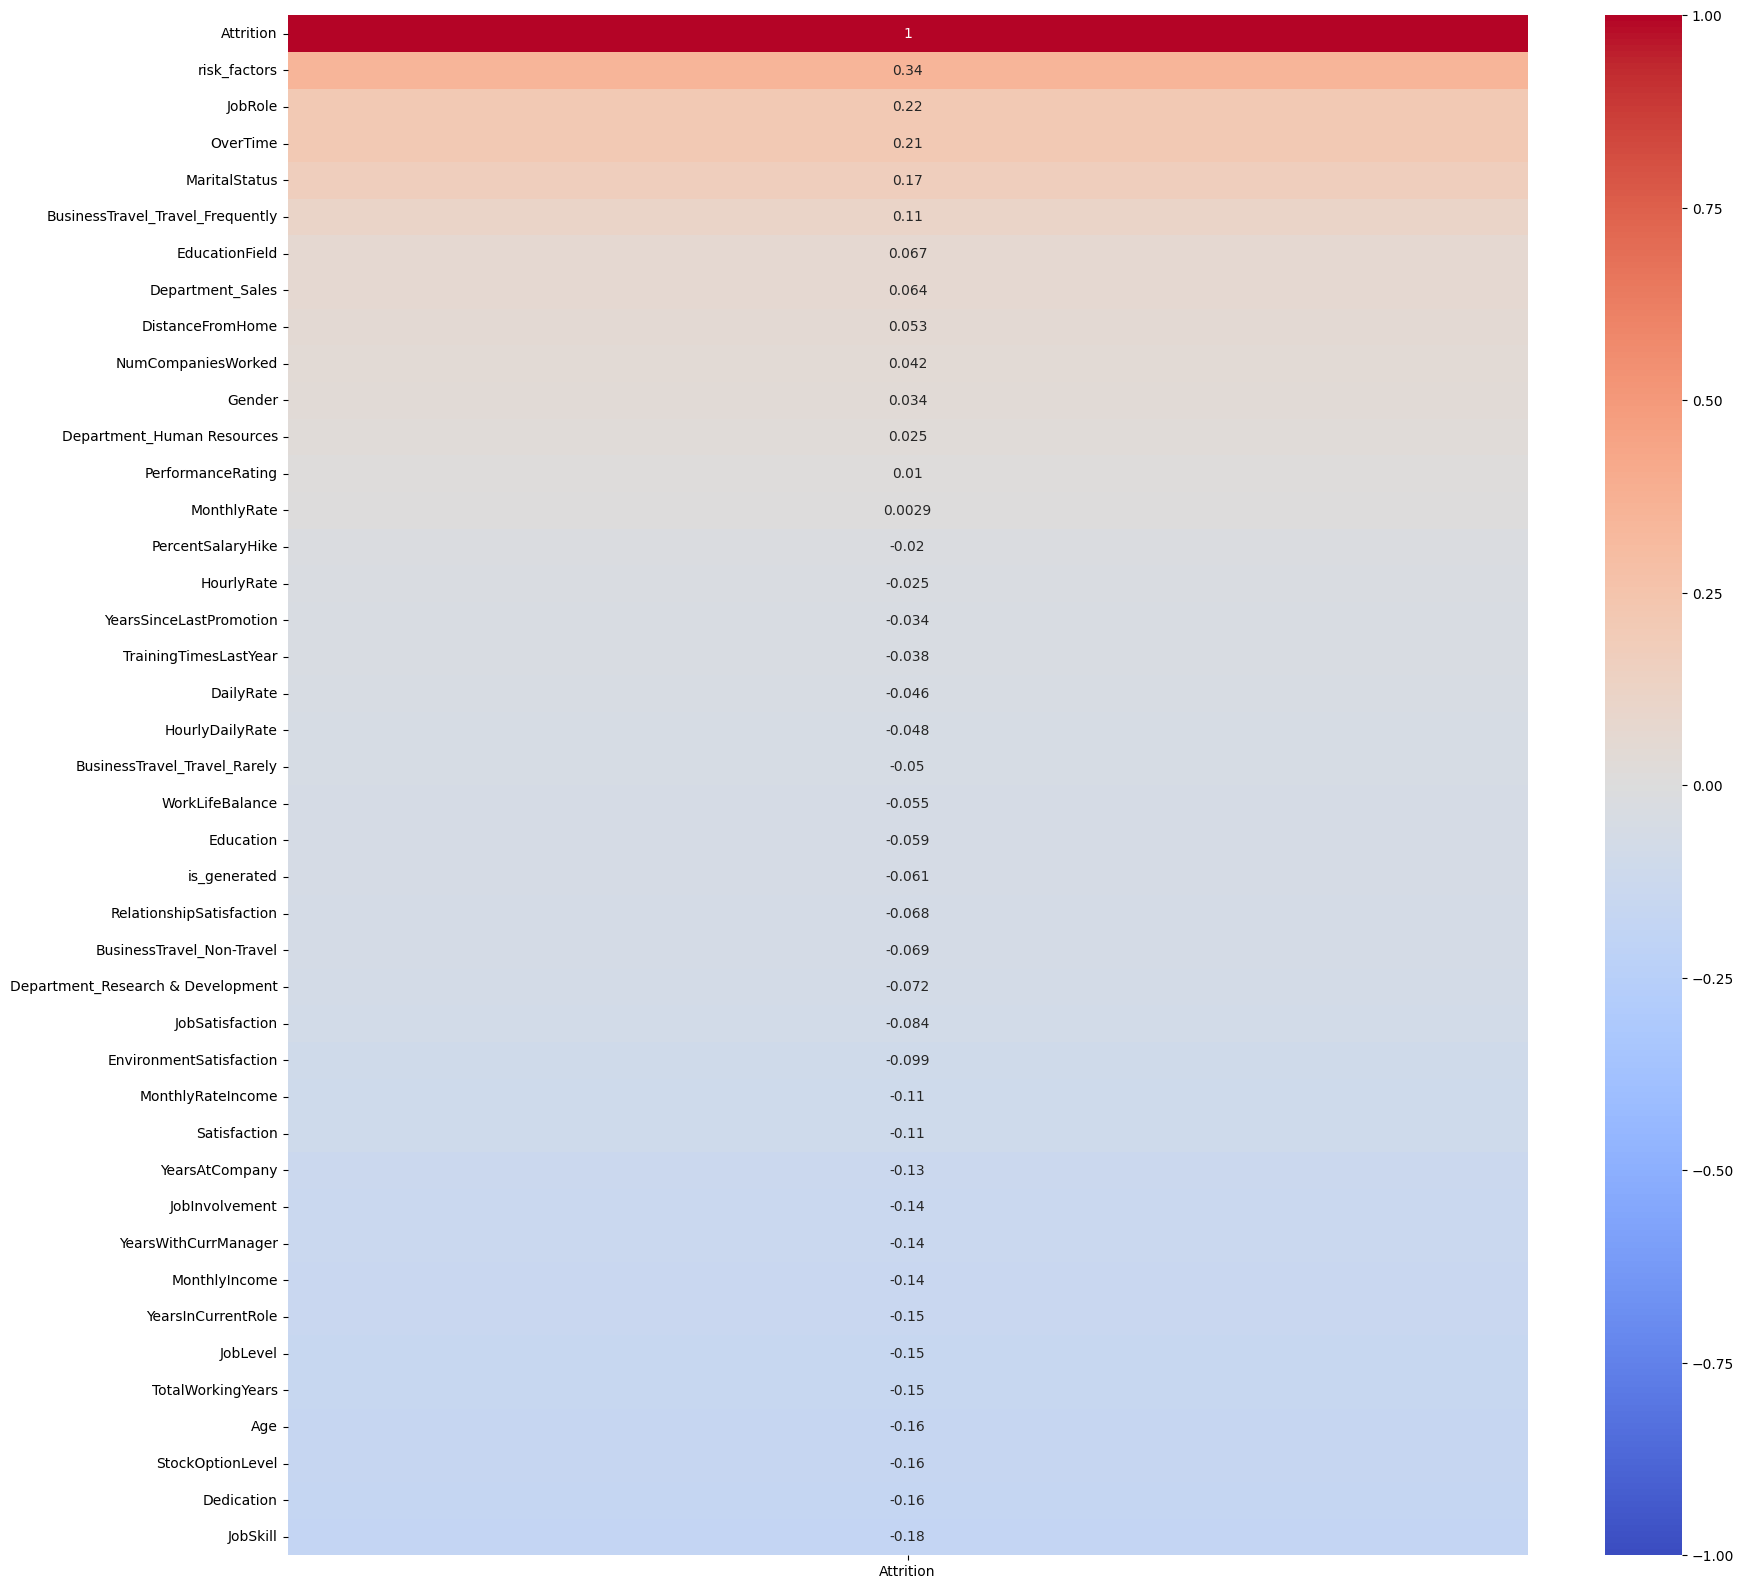

In [29]:
# Plotting the Correlation With Only Attrition Column
plt.figure(figsize=(20, 20))

sns.heatmap(
    train.corr()[[target]].sort_values(by=target, ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm",
)
plt.show()

In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load your train into X (features) and y (target variable)
X = train.drop(target, axis=1)  # Features
y = train[target]  # Target variable

# Step 2: Create an instance of the model you want to use for feature selection
estimator = RandomForestClassifier()

# Step 3: Create an instance of the RFE with the desired number of features
rfe = RFE(estimator, n_features_to_select=10)

# Step 4: Fit the RFE model to your train
rfe.fit(X, y)

# Step 5: Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(selected_features) 


Index(['Age', 'DailyRate', 'EducationField', 'JobRole', 'MonthlyIncome',
       'MonthlyRate', 'risk_factors', 'Dedication', 'MonthlyRateIncome',
       'HourlyDailyRate'],
      dtype='object')


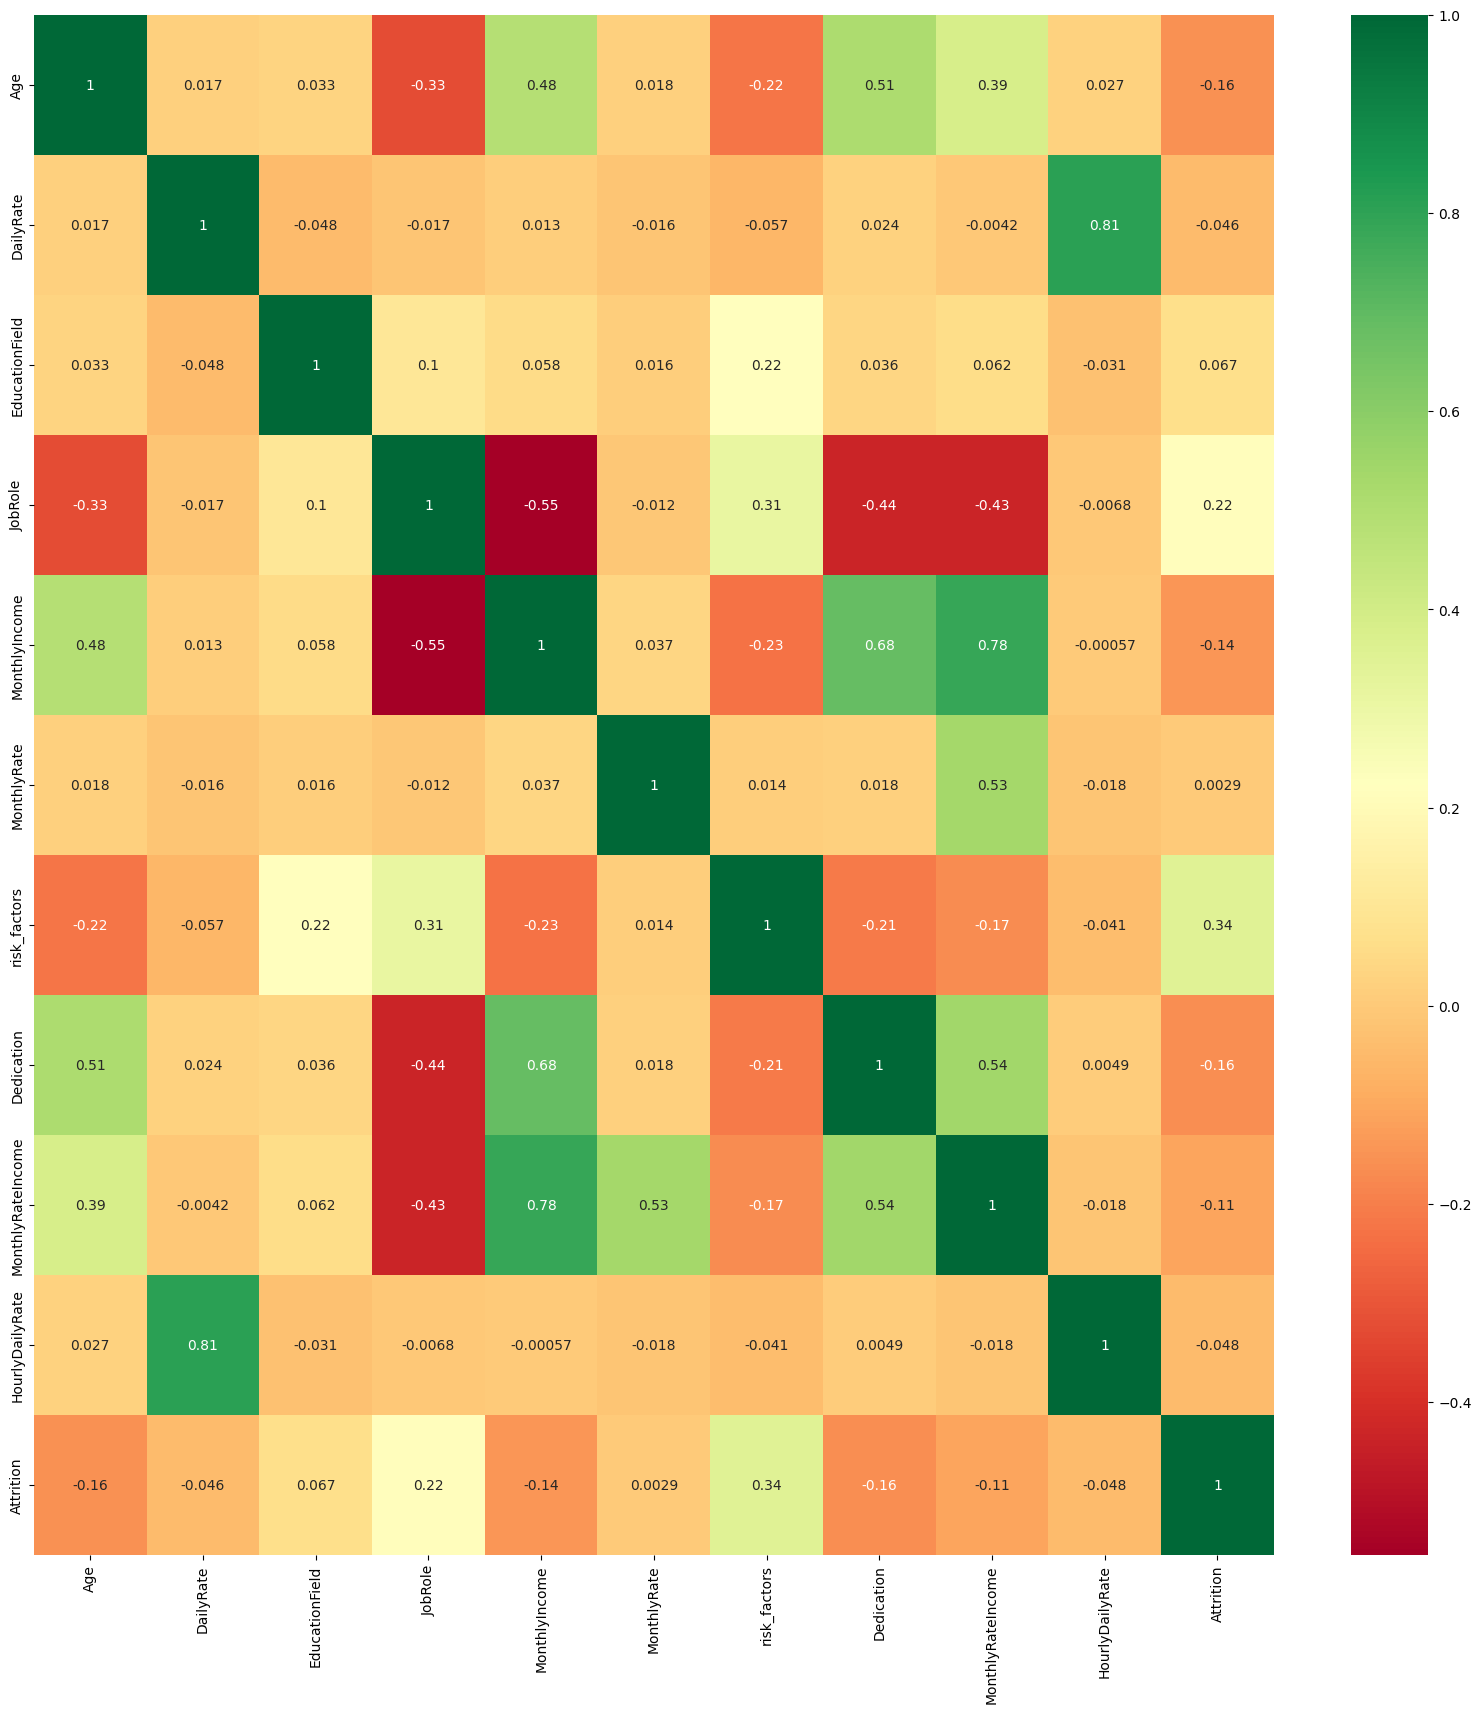

In [52]:
# Print the correlation matrix of the selected features
plt.figure(figsize=(20, 20))
sns.heatmap(train[list(selected_features) + [target]].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [53]:
# Splitting the data into train and validation set
X = train[list(selected_features)]
y = train[target]
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(2517, 10)
(630, 10)
(2517,)
(630,)


# Model Building

In [54]:
# Making a list of tuples containing the model name and the model object.
models = [
    (
        "Logistic Regression",
        LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000, penalty="l2"
        ),
    ),
    ("Decision Tree", DecisionTreeClassifier(random_state=101)),
    ("Random Forest", RandomForestClassifier(random_state=101)),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier(random_state=101)),
    ("CatBoost", CatBoostClassifier(verbose=0,random_state=101)),
]

In [55]:
# Creating a dataframe to store the result metrics of each model.
metrics = pd.DataFrame(
    columns=[
        "Model",
        "Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
        "ROC_AUC_Score",
        "Cross Validation Score",
    ]
)

# Iterating through the list of models.

for name, model in tqdm(models):
    # Cross validating the model.
    cv = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    # Appending the metrics to the dataframe.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    prec = precision_score(y_valid, y_pred)
    rec = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_pred)
    # Adding these metrics to the dataframe without appending them to the dataframe.
    metrics.loc[len(metrics)] = [name, acc, prec, rec, f1, roc_auc, np.mean(cv)]
    print("Confusion Matrix for", name)
    print(confusion_matrix(y_valid, y_pred))
    print("Classification Report for", name)
    print(classification_report(y_valid, y_pred))
    print("--------------------------------------------------")

 17%|█▋        | 1/6 [00:00<00:01,  4.14it/s]

Confusion Matrix for Logistic Regression
[[543   0]
 [ 87   0]]
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       543
           1       0.00      0.00      0.00        87

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

--------------------------------------------------


 33%|███▎      | 2/6 [00:00<00:00,  4.32it/s]

Confusion Matrix for Decision Tree
[[471  72]
 [ 61  26]]
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       543
           1       0.27      0.30      0.28        87

    accuracy                           0.79       630
   macro avg       0.58      0.58      0.58       630
weighted avg       0.80      0.79      0.79       630

--------------------------------------------------


 50%|█████     | 3/6 [00:05<00:07,  2.45s/it]

Confusion Matrix for Random Forest
[[535   8]
 [ 73  14]]
Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       543
           1       0.64      0.16      0.26        87

    accuracy                           0.87       630
   macro avg       0.76      0.57      0.59       630
weighted avg       0.85      0.87      0.84       630

--------------------------------------------------


 67%|██████▋   | 4/6 [00:07<00:04,  2.14s/it]

Confusion Matrix for XGBoost
[[524  19]
 [ 66  21]]
Classification Report for XGBoost
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       543
           1       0.53      0.24      0.33        87

    accuracy                           0.87       630
   macro avg       0.71      0.60      0.63       630
weighted avg       0.84      0.87      0.84       630

--------------------------------------------------


 83%|████████▎ | 5/6 [00:07<00:01,  1.59s/it]

Confusion Matrix for LightGBM
[[529  14]
 [ 70  17]]
Classification Report for LightGBM
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       543
           1       0.55      0.20      0.29        87

    accuracy                           0.87       630
   macro avg       0.72      0.58      0.61       630
weighted avg       0.84      0.87      0.84       630

--------------------------------------------------


100%|██████████| 6/6 [00:29<00:00,  4.84s/it]

Confusion Matrix for CatBoost
[[532  11]
 [ 70  17]]
Classification Report for CatBoost
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       543
           1       0.61      0.20      0.30        87

    accuracy                           0.87       630
   macro avg       0.75      0.59      0.61       630
weighted avg       0.85      0.87      0.84       630

--------------------------------------------------


In [56]:
metrics.sort_values(by="Precision", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC_Score,Cross Validation Score
2,Random Forest,0.871,0.636,0.161,0.257,0.573,0.865
5,CatBoost,0.871,0.607,0.195,0.296,0.588,0.867
4,LightGBM,0.867,0.548,0.195,0.288,0.585,0.861
3,XGBoost,0.865,0.525,0.241,0.331,0.603,0.859
1,Decision Tree,0.789,0.265,0.299,0.281,0.583,0.800
0,Logistic Regression,0.862,0.000,0.000,0.000,0.500,0.861


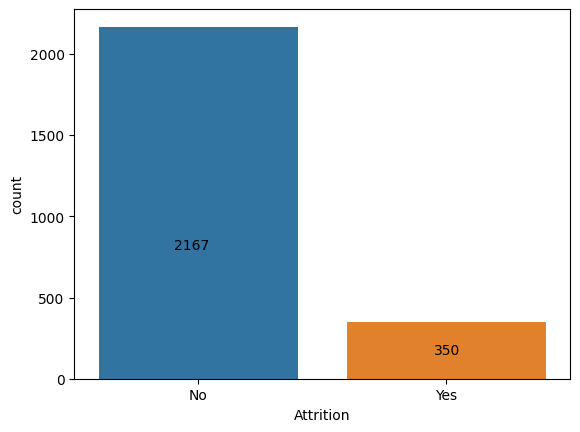

In [57]:
# Plotting the value count of the Attrition column in the train set.
sns.countplot(x=y_train)
# Plotting the value of the classes in the countplot.
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.text(x=-0.1, y=800, s=y_train.value_counts()[0])
plt.text(x=0.95, y=150, s=y_train.value_counts()[1])
plt.show()

In [58]:
# Using Smote to balance the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=101)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting the data into train and validation set
X_train_smote, X_valid_smote, y_train_smote, y_valid_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=101, stratify=y_smote
)

print(X_smote.shape)
print(y_smote.shape)
print(X_train_smote.shape)
print(X_valid_smote.shape)
print(y_train_smote.shape)
print(y_valid_smote.shape)

(5420, 10)
(5420,)
(4336, 10)
(1084, 10)
(4336,)
(1084,)


In [59]:
# Creating a dataframe to store the result smote_metrics of each model.
smote_metrics = pd.DataFrame(
    columns=[
        "Model",
        "Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
        "ROC_AUC_Score",
        "Cross Validation Score",
    ]
)

# Iterating through the list of models.

for name, model in models:
    # Cross validating the model.
    cv = cross_val_score(
        model, X_train_smote, y_train_smote, cv=5, scoring="accuracy", n_jobs=-1
    )
    # Appending the smote_metrics to the dataframe.
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_valid_smote)
    acc = accuracy_score(y_valid_smote, y_pred)
    prec = precision_score(y_valid_smote, y_pred)
    rec = recall_score(y_valid_smote, y_pred)
    f1 = f1_score(y_valid_smote, y_pred)
    roc_auc = roc_auc_score(y_valid_smote, y_pred)
    smote_metrics.loc[len(smote_metrics)] = [
        name,
        acc,
        prec,
        rec,
        f1,
        roc_auc,
        np.mean(cv),
    ]
    print("Confusion Matrix for", name)
    print(confusion_matrix(y_valid_smote, y_pred))
    print("Classification Report for", name)
    print(classification_report(y_valid_smote, y_pred))
    print("--------------------------------------------------")

Confusion Matrix for Logistic Regression
[[ 68 474]
 [ 26 516]]
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.13      0.21       542
           1       0.52      0.95      0.67       542

    accuracy                           0.54      1084
   macro avg       0.62      0.54      0.44      1084
weighted avg       0.62      0.54      0.44      1084

--------------------------------------------------
Confusion Matrix for Decision Tree
[[435 107]
 [ 99 443]]
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       542
           1       0.81      0.82      0.81       542

    accuracy                           0.81      1084
   macro avg       0.81      0.81      0.81      1084
weighted avg       0.81      0.81      0.81      1084

--------------------------------------------------
Confusion Matrix for Random Forest
[

In [60]:
smote_metrics.sort_values(by="Precision", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC_Score,Cross Validation Score
2,Random Forest,0.897,0.879,0.921,0.899,0.897,0.864
3,XGBoost,0.888,0.877,0.904,0.890,0.888,0.871
5,CatBoost,0.865,0.859,0.875,0.867,0.865,0.854
4,LightGBM,0.875,0.856,0.902,0.879,0.875,0.859
1,Decision Tree,0.810,0.805,0.817,0.811,0.810,0.775
0,Logistic Regression,0.539,0.521,0.952,0.674,0.539,0.534


# Using best 4 models for then taking the average of the predictions
estimators = [
    ("Catboost", CatBoostClassifier(verbose=0)),
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("Random Forest", RandomForestClassifier()),
    ("LightGBM", LGBMClassifier()),
]

# Creating a dataframe to store the result smote_metrics of each model.

res = test[["id"]]
for name, model in estimators:
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict_proba(test[features])
    # Saving the predictions in a dataframe.
    res[name] = y_pred[:, 1]
    pass

# Taking the average of the predictions.
res["Attrition"] = res.drop("id", axis=1).mean(axis=1)

# Saving the predictions in a csv file.
res[["id", "Attrition"]].to_csv("submission.csv", index=False)

# Creating model using best estimator Random Forest Classifier with Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Creating a parameter grid to pass in the GridSearchCV.

param_grid = {
    "n_estimators": [100, 150, 200, 250],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
}

# Creating the GridSearchCV object.

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=101),
    param_grid=param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
    verbose=1,
)

# Fitting the GridSearchCV object on the train set.

grid.fit(X_train_smote, y_train_smote)

# Getting the best parameters.

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

ROC_AUC_Score 0.8911439114391143
Accuracy 0.8911439114391144
Confusion Matrix
 [[472  70]
 [ 48 494]]


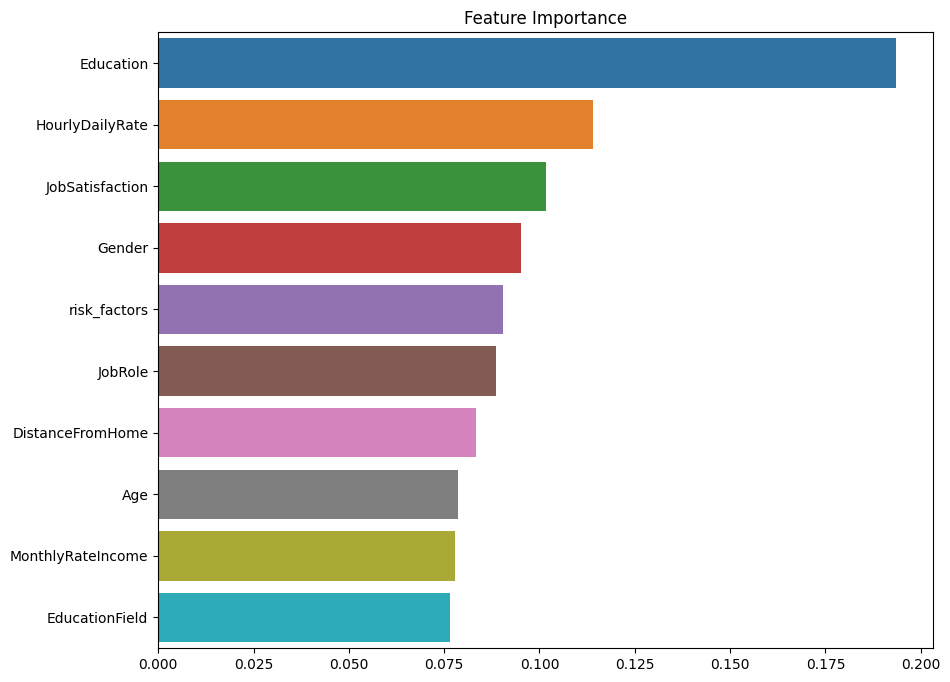

In [61]:
# Creating a Random Forest Classifier with the best parameters.
"""Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9337492582592729
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=101)"""

# params = {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200,"random_state":101}

rfc = RandomForestClassifier()

# Fitting the model on the train set.

rfc.fit(X_train_smote, y_train_smote)

# Predicting the target variable on the train set.

y_pred = rfc.predict(X_valid_smote)

# Getting the roc_auc_score on the train set.

print('ROC_AUC_Score',roc_auc_score(y_valid_smote, y_pred))
print('Accuracy',accuracy_score(y_valid_smote, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_valid_smote, y_pred))

# Feature Importance

# Zip the feature names with the feature importances and sort them.

feature_imp = sorted(zip(features, rfc.feature_importances_), key=lambda x: x[1],reverse=True)

# Plotting a horizontal barplot.

plt.figure(figsize=(10, 8))
sns.barplot(x=[x[1] for x in feature_imp], y=[x[0] for x in feature_imp])
plt.title("Feature Importance")
plt.show()

ROC_AUC_Score 0.8883763837638377
Accuracy 0.8883763837638377
Confusion Matrix
 [[473  69]
 [ 52 490]]


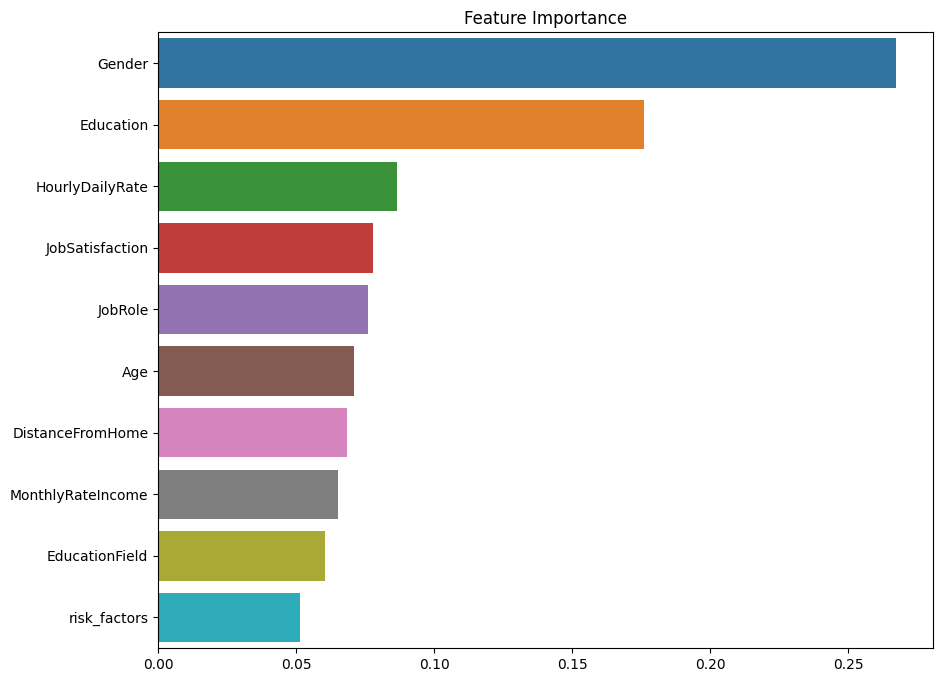

In [62]:
# Creating a Random Forest Classifier with the best parameters.

xgb = XGBClassifier()

# Fitting the model on the train set.

xgb.fit(X_train_smote, y_train_smote)

# Predicting the target variable on the train set.

y_pred = xgb.predict(X_valid_smote)

# Getting the roc_auc_score on the train set.

print('ROC_AUC_Score',roc_auc_score(y_valid_smote, y_pred))
print('Accuracy',accuracy_score(y_valid_smote, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_valid_smote, y_pred))

# Feature Importance

# Zip the feature names with the feature importances and sort them.

feature_imp = sorted(zip(features, xgb.feature_importances_), key=lambda x: x[1], reverse=True)

# Plotting a horizontal barplot.

plt.figure(figsize=(10, 8))
sns.barplot(x=[x[1] for x in feature_imp], y=[x[0] for x in feature_imp])
plt.title("Feature Importance")
plt.show()

ROC_AUC_Score 0.8653136531365313
Accuracy 0.8653136531365314
Confusion Matrix
 [[464  78]
 [ 68 474]]


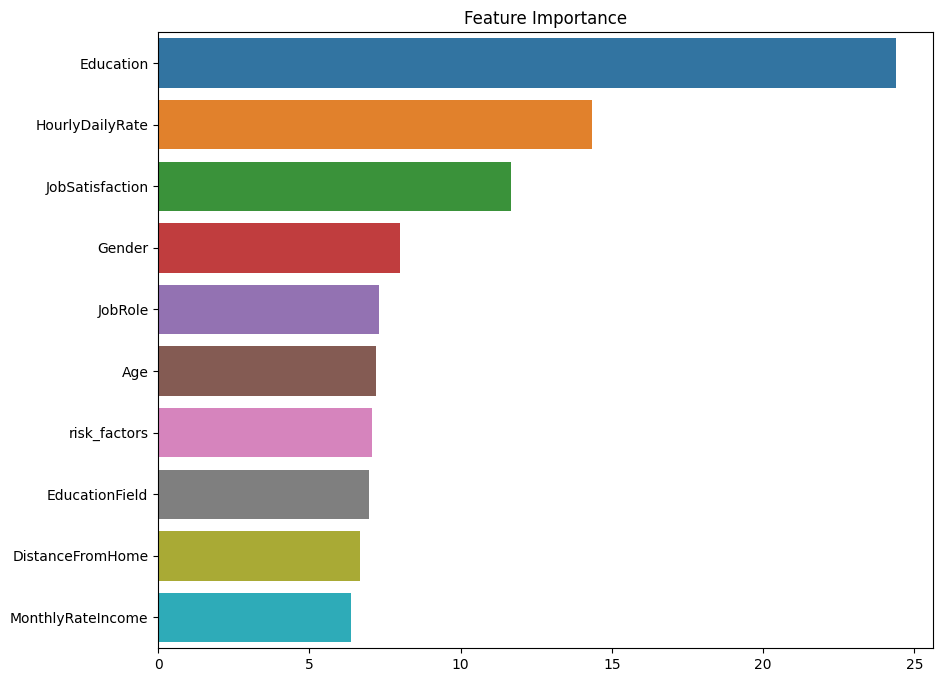

In [63]:
# Creating a Random Forest Classifier with the best parameters.

cb = CatBoostClassifier(verbose=0,random_state=101)

# Fitting the model on the train set.

cb.fit(X_train_smote, y_train_smote)

# Predicting the target variable on the train set.

y_pred = cb.predict(X_valid_smote)

# Getting the roc_auc_score on the train set.

print('ROC_AUC_Score',roc_auc_score(y_valid_smote, y_pred))
print('Accuracy',accuracy_score(y_valid_smote, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_valid_smote, y_pred))

# Feature Importance

# Zip the feature names with the feature importances and sort them.

feature_imp = sorted(zip(features, cb.feature_importances_), key=lambda x: x[1], reverse=True)

# Plotting a horizontal barplot.

plt.figure(figsize=(10, 8))
sns.barplot(x=[x[1] for x in feature_imp], y=[x[0] for x in feature_imp])
plt.title("Feature Importance")
plt.show()

# SUMMARY 

# Feature Engineering